In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('C:\\Users\\LOQ\\OneDrive - Arab Academy for Science and Technology\\DEPI\\GIZ4_AIS2_S1_ML\\src\\DA\\Session_4\\Data\\train.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [12]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({'dtypes': dtypes, 'n_unique': n_unique}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtypes,int64,int64,str,float64,int64,int64,float64,str,str
n_unique,2,3,2,88,7,7,248,147,3


In [15]:
'''
this function for checking dataframe info
'''
def chk(df):
    dtypes = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({'dtypes': dtypes, 'n_unique': n_unique}).T


In [16]:
chk(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtypes,int64,int64,str,float64,int64,int64,float64,str,str
n_unique,2,3,2,88,7,7,248,147,3


In [17]:
from functions import chk
chk(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtypes,int64,int64,str,float64,int64,int64,float64,str,str
n_unique,2,3,2,88,7,7,248,147,3


In [ ]:
# convert this code to function 
cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
df[cols] = df[cols].astype('category')
chk(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtypes,category,category,category,float64,category,category,float64,str,category
n_unique,2,3,2,88,7,7,248,147,3


In [ ]:

def convert_to_category(df,cols):
    df[cols] = df[cols].astype('category')
    return chk(df)

In [19]:
nulls = df.isnull().sum()
nulls

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [21]:
ration = nulls / len(df) * 100
ration
pd.DataFrame({'Null': nulls, 'Ratio': ration}).T


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [22]:
def chk_nulls(df):
    nulls = df.isnull().sum()
    ration = nulls / len(df) * 100
    return pd.DataFrame({'Null': nulls, 'Ratio': ration}).T

In [23]:
from nulls import chk_nulls
chk_nulls(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [31]:
df = df.dropna(subset=['Embarked'])

In [ ]:
# error
df = df.drop(columns=['Cabin'], errors='ignore')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,19.910011,0.0,0.0,0.0,0.0


In [36]:
median = df['Age'].median()
df['Age'].fillna(median, inplace=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_20440\3397469017.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Age'].fillna(median, inplace=True)


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [37]:
chk_nulls(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,19.910011,0.0,0.0,0.0,0.0


In [39]:
df.describe()

,Age,Fare
count,712.000000,889.000000
mean,29.642093,32.096681
std,14.492933,49.697504
min,0.420000,0.000000
25%,20.000000,7.895800
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [ ]:
print("Preprocessing completed successfully.")

In [40]:
pip install matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.3 MB 3.7 MB/s eta 0:00:01
   ---------------------- ----------------- 1.3


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

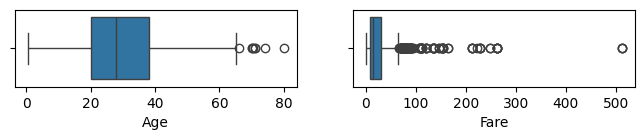

In [46]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1,2 , i + 1)
    sns.boxplot(x=df[col],orient='h')
    '''sns.histplot(df[col], kde=True)
    plt.title(col)'''

In [52]:
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr

    lower_outliers = df[df[col] < lower_fence][col].values
    upper_outliers = df[df[col] > upper_fence][col].values

    df[col].replace(upper_outliers, upper_fence , inplace=True)
    df[col].replace(lower_outliers, lower_fence, inplace=True) 

    '''outliers = df[(df[col] < lower_fence) | (df[col] > upper_fence)]
    print(f'Outliers in {col}:')
    print(outliers[[col]])'''

C:\Users\LOQ\AppData\Local\Temp\ipykernel_20440\1213752314.py:12: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df[col].replace(upper_outliers, upper_fence , inplace=True)
C:\Users\LOQ\AppData\Local\Temp\ipykernel_20440\1213752314.py:13: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained a

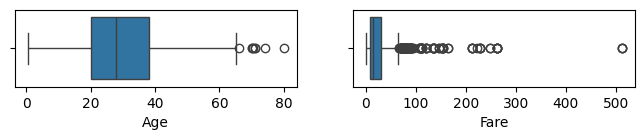

In [53]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1,2 , i + 1)
    sns.boxplot(x=df[col],orient='h')
    '''sns.histplot(df[col], kde=True)
    plt.title(col)'''

In [55]:
df.duplicated().sum()

np.int64(111)

In [56]:
df.drop_duplicates(inplace=True)

In [57]:
df.duplicated().sum()

np.int64(0)